# Color Spaces: RGB and HSI

In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 4, 4

# RGB safe colors
RGB cube faces displaying the safe colors

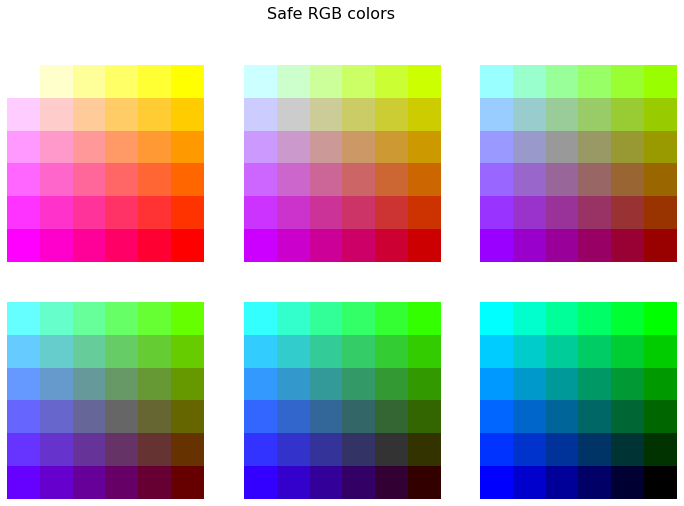

In [2]:
values = [0, 51, 102, 153, 204, 255]

root = list(itertools.product(values, values, values))
colors = [np.array(color) for color in root]

images = []
for value in values:
    r0 = [color for color in colors if color[0]==value]
    r = [c[0] for c in r0]
    r = np.reshape(r, (6,6))


    g = [c[1] for c in r0]
    g = np.reshape(g, (6,6))


    b = [c[2] for c in r0]
    b = np.reshape(b, (6,6))


    img = np.rot90(np.uint8(np.dstack([r,g,b])), 2)
    images.append(img)


fig, axs = plt.subplots(2, 3,figsize=(12,8))
axs[0, 0].imshow(images[5])
axs[0, 0].axis('off')

axs[0, 1].imshow(images[4])
axs[0, 1].axis('off')

axs[0, 2].imshow(images[3])
axs[0, 2].axis('off')

axs[1, 0].imshow(images[2])
axs[1, 0].axis('off')

axs[1, 1].imshow(images[1])
axs[1, 1].axis('off')

axs[1, 2].imshow(images[0])
axs[1, 2].axis('off')

fig.suptitle('Safe RGB colors', fontsize = 16)

plt.show()


# HSI to RGB 

In [3]:
def hsi2rgb(H, S, I):
    if (H >= 0) and (H < 120):
        b = I*(1 - S)
        r = I*( 1 + (S*math.cos(math.radians(H))/(math.cos( math.radians(60 - H)))) )
        g = 3*I - b - r

    elif (H >= 120) and (H < 240):
        r = I*(1 - S)
        g = I*( 1 + (S*math.cos(math.radians(H - 120))/(math.cos( math.radians(180 - H)))) )
        b = 3*I - r - g
    else:
        g = I*(1 - S)
        b = I*( 1 + (S*math.cos(math.radians(H - 240))/(math.cos( math.radians(300 - H)))) )
        r = 3*I - g - b
    
    r, g, b, = np.round(np.clip(255*r, 0, 255)), np.round(np.clip(255*g, 0, 255)), np.round(np.clip(255*b, 0, 255))
    return np.uint8(r), np.uint8(g), np.uint8(b)

def rgb2hsi(R, G, B):
    r = R/255
    g = G/255
    b = B/255

    d_rg = r - g
    d_rb = r - b
    d_gb = g - b
    
    num = (d_rg + d_rb)/2
    den = np.sqrt(np.square(d_rg) + (d_rb*d_gb)) + 0.000001
    frac = num / den
    theta = np.arccos( frac )
    theta = (theta / np.pi)*180

    h = np.round(theta if b<=g else 360 - theta, 2)

    s = 1 - (3/(r+g+b+0.000001))*np.minimum(np.minimum(r,g),b)

    i = (r+g+b)/3
    
    return h, s, i

# Validation
Uses the rgb2hsi and hsi2rgb together to validate the conversion.

In [4]:
R, G, B = 47, 91, 23
h, s, i = rgb2hsi(R, G, B)
print(hsi2rgb(h, s, i))

(47, 91, 23)


# HSI space in circular slices (sliced by intensity values)

In [5]:
def get_radius(i):
    if i >= 0.5:
        return (1 - i)
    return i

def plot_hsi(i):
    R = get_radius(i)
    hue = np.linspace(0, 360, 360, endpoint = True)
    saturation = np.linspace(0, R, 50, endpoint = True)
    for h in hue:
        for s in saturation:
            rgb = np.array(hsi2rgb(h, 1, i))
            c = (s/R)*rgb + ((R - s)/R)*np.array(hsi2rgb(0, 0, i)) if R != 0 else np.array(hsi2rgb(0, 0, i))
            
            plt.scatter(s*math.cos(math.radians(h)), s*math.sin(math.radians(h)), color = c/255)
            plt.title('Intensity = ' + str(i))
            plt.axis("off")
    plt.show()

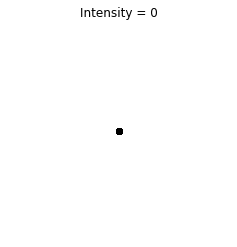

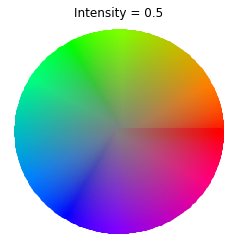

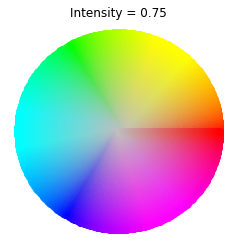

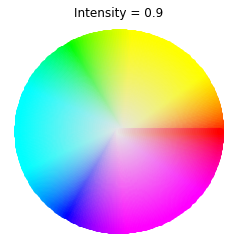

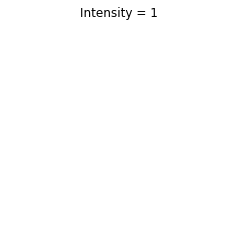

In [6]:
plot_hsi(0)
plot_hsi(0.5)
plot_hsi(0.75)
plot_hsi(0.9)
plot_hsi(1)

# HSI space in triangular slices (sliced by intensity values)

In [7]:
def r(angle, i, n = 3):
    return get_radius(i)*(math.cos( math.pi/n  ) / math.cos( ((math.radians(angle) + math.pi/6) % (2*math.pi / n) ) - (math.pi/n) ))

def plot_hsi_triangle(i):
    R = get_radius(i)
    hue = np.linspace(-30, 330, 360, endpoint = True)
    saturation = np.linspace(0, R, 50, endpoint = True)
    for h in hue:
        for s in saturation:
            theta = math.radians(h)
            rgb = np.array(hsi2rgb(h + 30, 1, i))
            c = (s/R)*rgb + ((R - s)/R)*np.array(hsi2rgb(0, 0, i)) if R != 0 else np.array(hsi2rgb(0, 0, i))
            plt.scatter(r(h, i)*s*math.cos(theta), r(h, i)*s*math.sin(theta), color = c/255 )
            plt.title('Intensity = ' + str(i))
            plt.axis("off")
    plt.show()

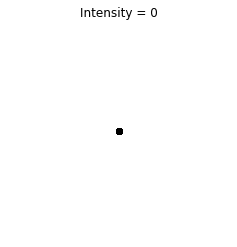

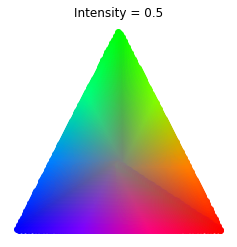

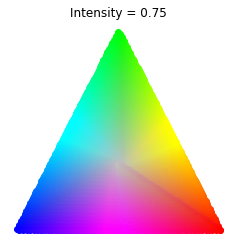

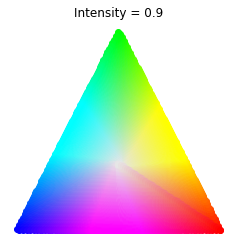

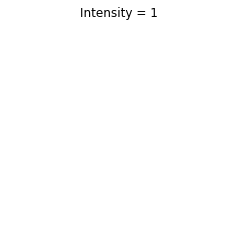

In [8]:
plot_hsi_triangle(0)
plot_hsi_triangle(0.5)
plot_hsi_triangle(0.75)
plot_hsi_triangle(0.9)
plot_hsi_triangle(1)